# Term Deposit Bank Case - Ensemble Techniques.

### by Rodrigo H Correa

This is the 3rd case presented for the University of Texas at Austin Post Graduate Program in Artificial Intelligence and Machine Learning.

Just like always and as good practice, the first part is always importing the necessary libraries.


In [1]:
# Step one: importing the necessary packages
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## About the Dataset

The Dataset used is called bank-full, and it comprises of ~45k observations with client data and outcome of a campaign focused in increasing the adherence to term deposits.


In [2]:
#Step two: import the csv file
df = pd.read_csv('bank-full.csv')

## About the objective

The objective is to create a Machine Learning model, using Ensemble Techniques in order to direct the bank efforts to clients and predict success in the campaigns for the aforementioned product.

Therefore, in order to discover the best model, and, more importantly, figuring out the best course of strategic action for the bank, there will be used a number of techniques to improve those chances.

In [3]:
#Acquiring a basic DataSet description
df.describe().T

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  
5  unknown    5   may       139         1     -1         0  unknown     no  
6  unknown    5   may       217         1     -1         0  unknown     no  
7  unknown    5   may       380         1     -1         0  unknown     no  
8  unknown    5   may        50         1     -1         0  unknown     no  
9  unknown    5   may        55         1     -1         0  unknown     no

## EDA Analysis Using Pandas Profiling

I like to use Pandas Profiling since it presents a comprehensive, full-scale analysis with little coding. From, those, I will highlight the main discoveries.

In [6]:
#Using pandas profiling for a more detailed understanding of the variables.
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_notebook_iframe()

  ### Major appointments from Pandas Profiling.
  
Despite not presenting missing values as so, there are a couple of "strange things going on" with the Dataset.
  
The first one found is the variable pdays, with a very strong frequency in minus 1, meaning the client was contacted in -1 days passed. This does not seem to make sense.

The second one, a little more subtle but also with a higher consequence: poutcoume, with a very high ocurrence of "unknown" outcomes.

#### Well, using a prediction model that in the end answers you "I don't know" seems to me pretty much a waste of effort.

For that, those issues will be addressed later on, maybe even presented in different models for comparison.

For now, I'll simply finish the EDA analysis with a couple highlights.
  

In [7]:
#checking (highlighting) the presence of null values.
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [8]:
# Just some configs for a better Seaborn experience.
sns.set("poster")
sns.set_style('whitegrid')

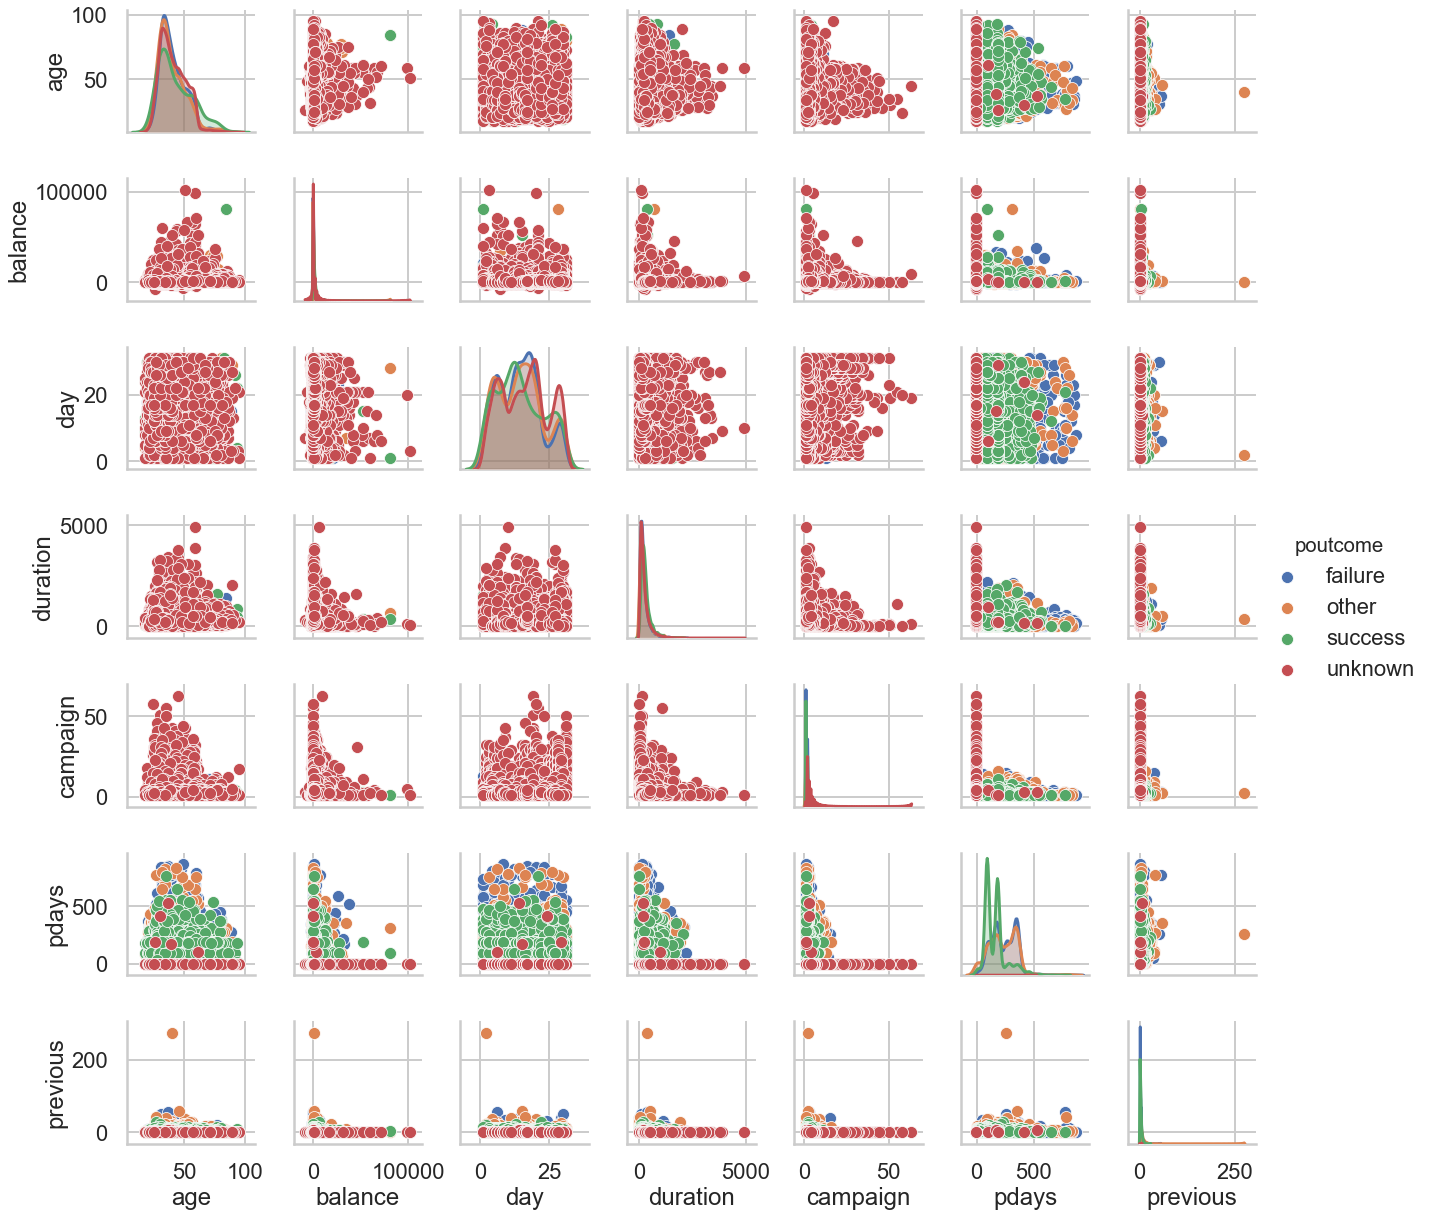

In [9]:
#Verifying the outcomes of the campaign based on the remaining factors.
sns.pairplot(df, hue = "poutcome")

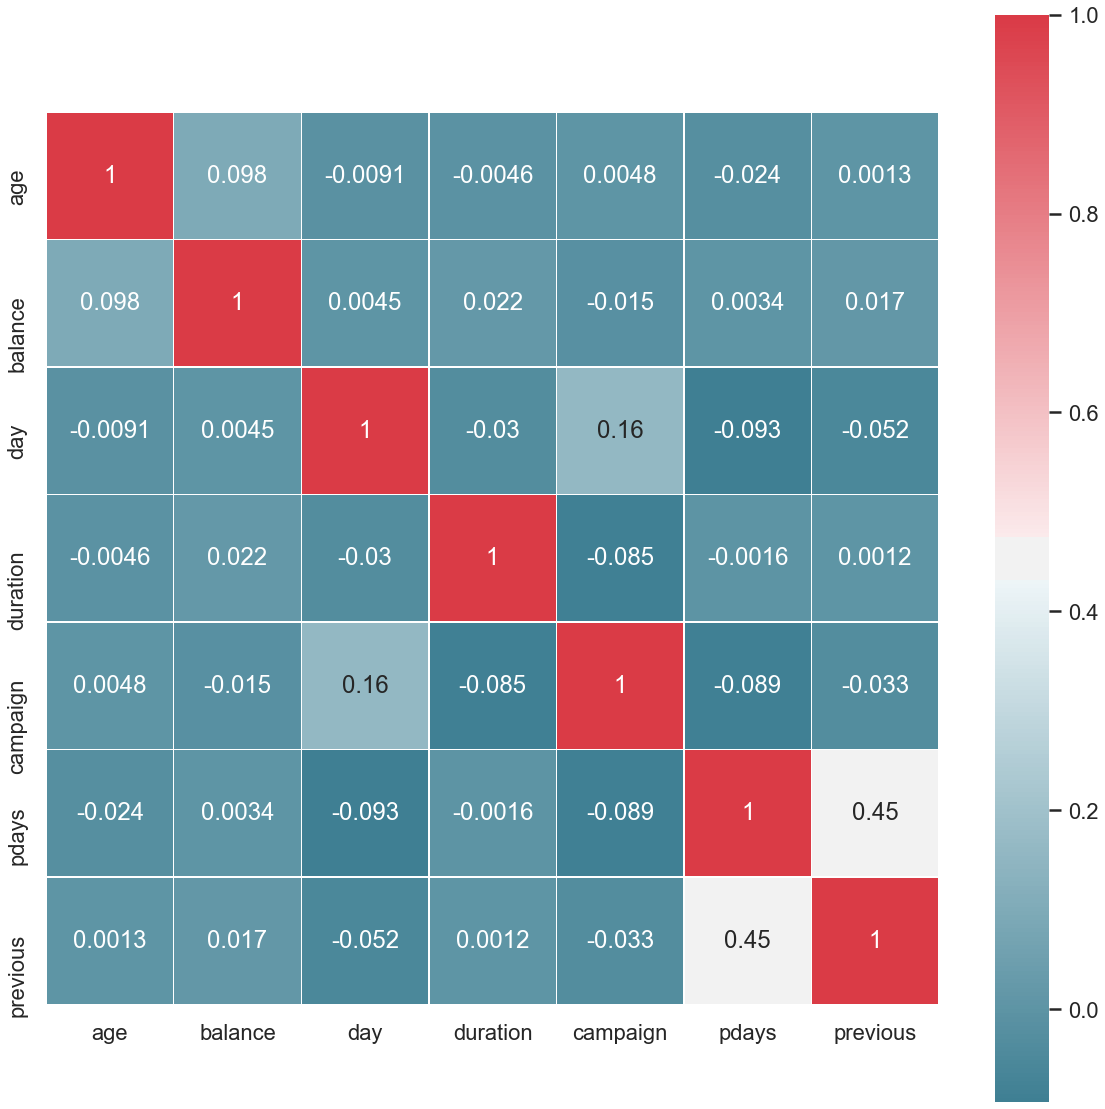

In [10]:
#Presenting the Correlation matrix for the variables.
plt.figure( figsize = (20,20))
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, cmap = cmap,  square = True, linewidth = .5, annot = True)

## Final EDA Remarks

The pairplot and the correlation matrix did not reveal anything standing out. Mainly in terms of importance of features, which do not seem to present one single feature that would, indeed, give us any insight whether there will be a better or worse response.

## Dealing with the "funny" Data.

As mentioned before, two major things caught my attention in the Dataset.

1) Variable pdays with negative values: might mean the person will be contacted in the future, but from there we simply cannot infer anything.

2) Variable poutcome with a lot (36k) of registered "unknown" values. This basically means a campaign was conducted with a certain client and from that we have no idea of what happened next, being either failure or success. My two cents is that this is a great deal of noise to be taken care of. There is high incidence of "other" as well, that may indicate, let's say, hiring a different service than the one offered. This is not the target as well, but not necessarily bad.

From that point on, my first task here is to understand and determine the course of action.

#### pdays: convert to zero, the next logical number. 

#### poutcome: Filter a little more and understand what kind of bias influences this "missing" value.

Even so, I will create new objects and by the end, run the "dirty" model for comparison.

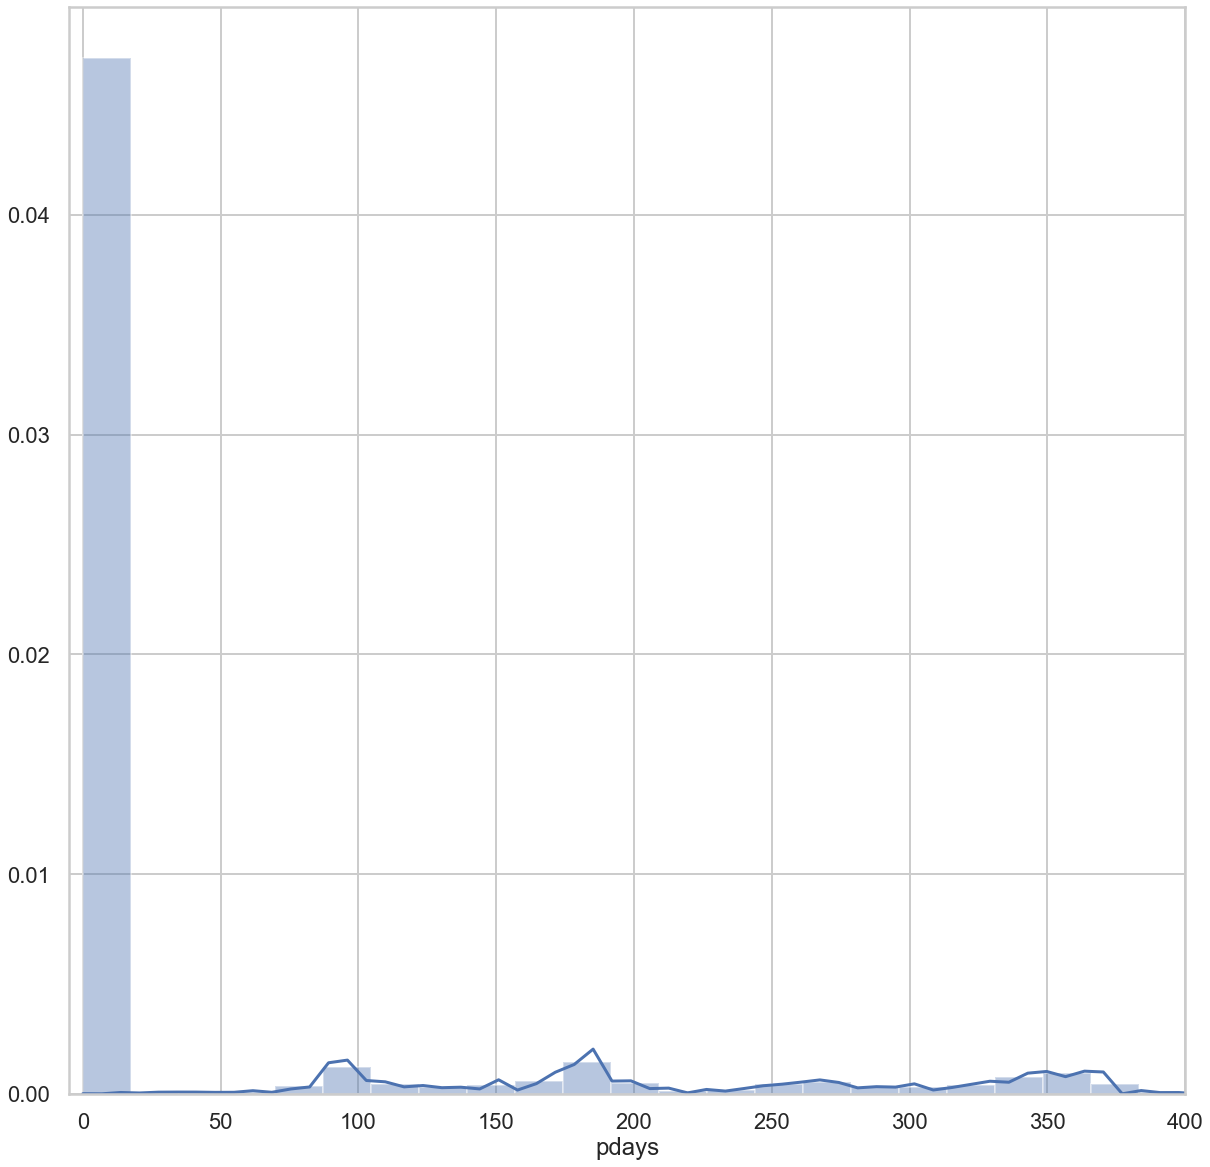

In [11]:
#Converting negative pdays value into zero.
df.pdays.replace({-1:0}, inplace = True)
plt.figure( figsize = (20,20))
plt.xlim(-5, 400)
sns.distplot(df.pdays)

### Understanding missing (unknown) values in poutcome

First, it is important to understand the nature of the missing data, since it could be Missing at Random (MAR), Missing Completely at Random (MCAR) or Missing not at random (MNAR): source(https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4).

The main difference is that MAR and MCAR presents missing value for no particular reason compared to the target variable.

There seems that the unknown values is somehow related to the time components of the campaign; it seems we are facing a MAR problem.

Still, the original dataset is kept as df and will remain so to be tested.

In [12]:
#Creating a new Dataset, excluding the "unknown" outcomes, which are pure noise.
known_outcomes = df.poutcome != "unknown"

In [13]:
df2 = df[known_outcomes]
df2.describe().T

count         mean          std     min    25%    50%      75%  \
age       8252.0    40.954556    11.424585    18.0   33.0   38.0    48.00   
balance   8252.0  1557.323558  3061.334465 -1884.0  167.0  603.0  1743.75   
day       8252.0    14.287203     7.918667     1.0    7.0   14.0    20.00   
duration  8252.0   260.065439   235.142495     1.0  113.0  193.0   324.00   
campaign  8252.0     2.055986     1.561340     1.0    1.0    2.0     2.00   
pdays     8252.0   224.544353   115.300549     1.0  133.0  194.5   327.00   
previous  8252.0     3.177412     4.561864     1.0    1.0    2.0     4.00   

              max  
age          93.0  
balance   81204.0  
day          31.0  
duration   2219.0  
campaign     16.0  
pdays       871.0  
previous    275.0

In [14]:
df.describe().T

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    41.015195    99.792615     0.0    0.0    0.0     0.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

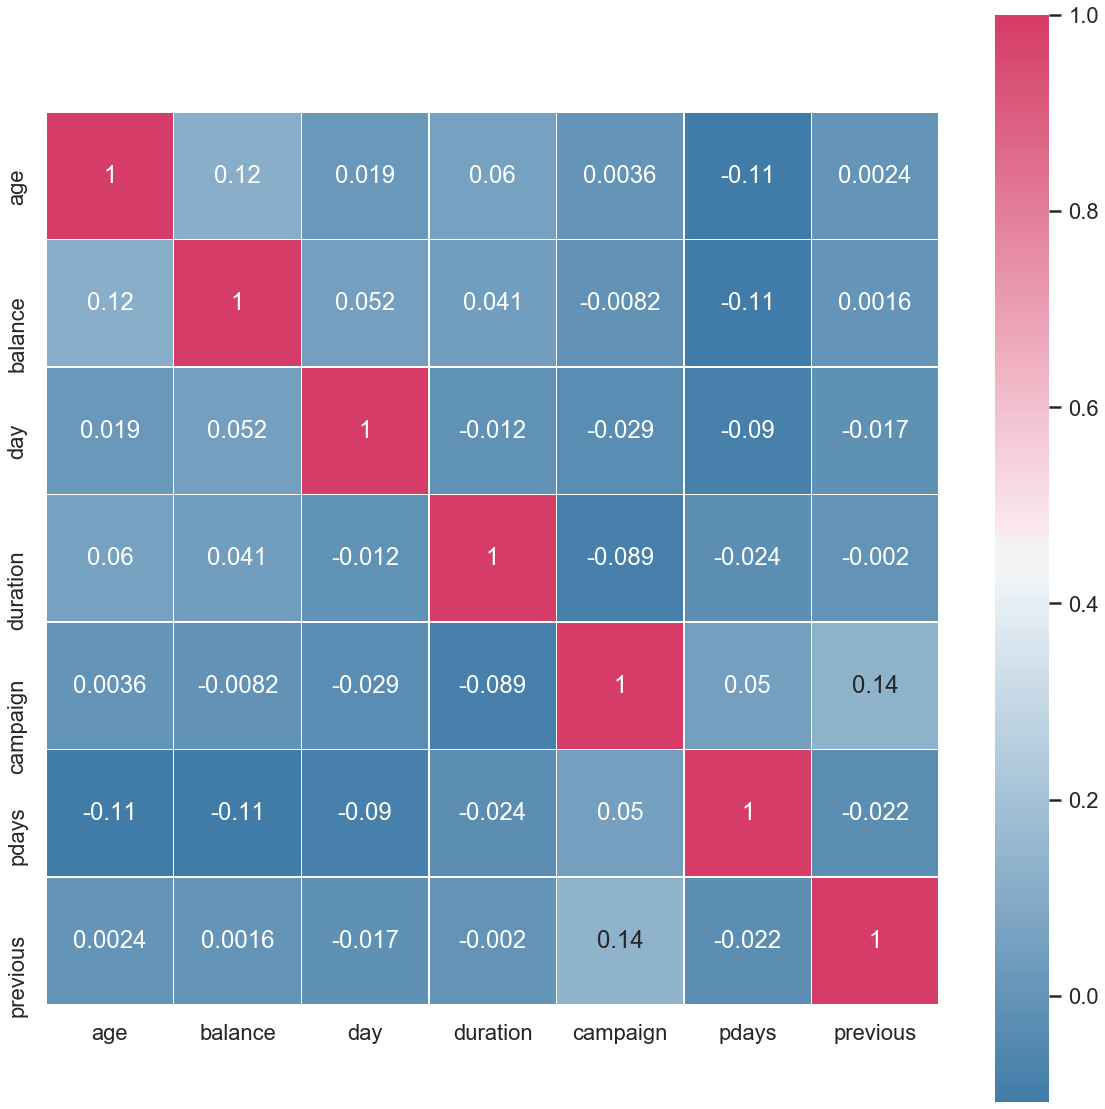

In [15]:
#Presenting the Correlation matrix for the variables for the clean set.
plt.figure( figsize = (20,20))
corr = df2.corr()
cmap = sns.diverging_palette(600, 1, as_cmap = True)
sns.heatmap(corr, cmap = cmap,  square = True, linewidth = .5, annot = True)

## Processing the clean set.

In [16]:
# Changing categorical variables into numeric labels.

from sklearn.preprocessing import LabelEncoder
df3 = df2.copy()

lb_make = LabelEncoder()

df3['job'] = lb_make.fit_transform(df2['job'])
df3['marital'] = lb_make.fit_transform(df2['marital'])
df3['education'] = lb_make.fit_transform(df2['education'])
df3['month'] = lb_make.fit_transform(df2['month'])
df3['poutcome'] = lb_make.fit_transform(df2['poutcome'])
df3['contact'] = lb_make.fit_transform(df2['contact'])
df3['default'] = lb_make.fit_transform(df2['default'])
df3['housing'] = lb_make.fit_transform(df2['housing'])
df3['loan'] = lb_make.fit_transform(df2['loan'])
df3['Target'] = lb_make.fit_transform(df2['Target'])
df3.head()

age  job  marital  education  default  balance  housing  loan  contact  \
24060   33    0        1          2        0      882        0     0        1   
24062   42    0        2          1        0     -247        1     1        1   
24064   33    7        1          1        0     3444        1     0        1   
24072   36    4        1          2        0     2415        1     0        1   
24077   36    4        1          2        0        0        1     0        1   

       day  month  duration  campaign  pdays  previous  poutcome  Target  
24060   21     10        39         1    151         3         0       0  
24062   21     10       519         1    166         1         1       1  
24064   21     10       144         1     91         4         0       1  
24072   22     10        73         1     86         4         1       0  
24077   23     10       140         1    143         3         0       1

## Creating the train and test split.

In [17]:
#importing some additional libraries necessary for the split.
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [18]:
#Separating the columns
all_feats = ['job', 'marital', 'education', 'default', 'housing', 
             'loan', 'contact', 'month', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
X = df3[all_feats] #creating the X variables
y = df3.Target # creating the y variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

## Modelling the Decision Tree with the "clean" Dataset.

In [21]:
#Creating the Decision Tree Classifier.
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=42)
dTree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [22]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.7944264943457189


In [23]:
#Inserting Max Depth to prevent overfitting
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, random_state=42)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8587257617728532
0.8408723747980614


In [67]:
#Verifying the importance of each of the features included in the Dataset.
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Importance"], index = X_train.columns))

           Importance
job          0.007228
marital      0.004279
education    0.000000
default      0.000000
housing      0.066985
loan         0.006125
contact      0.000000
month        0.016961
age          0.013471
balance      0.013278
day          0.016415
duration     0.308962
campaign     0.000000
pdays        0.071327
previous     0.003269
poutcome     0.471699


In [25]:
y_pred = dTree.predict(X_test)

In [26]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1935
           1       0.53      0.60      0.56       541

    accuracy                           0.79      2476
   macro avg       0.70      0.72      0.71      2476
weighted avg       0.80      0.79      0.80      2476



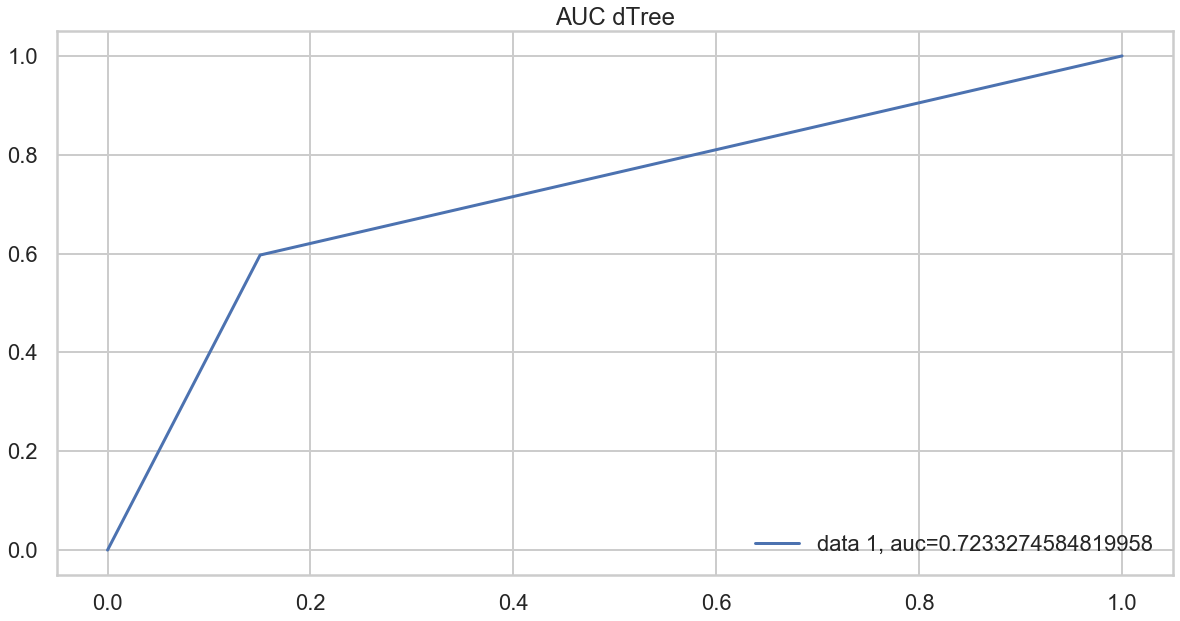

In [27]:
#Plotting the ROC curve
plt.figure( figsize = (20,10))
y_pred_proba = dTree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.title('AUC dTree')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

0.8408723747980614


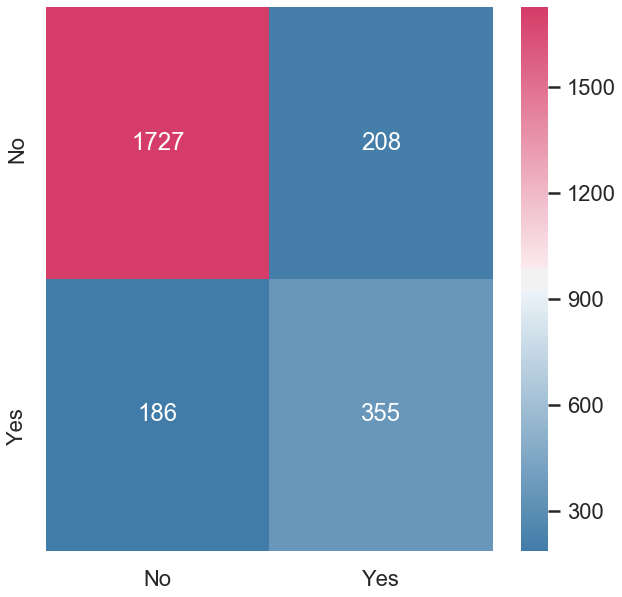

In [28]:
#Scoring and creating the Confusion Matrix.
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (10,10))
sns.heatmap(df_cm,cmap = cmap, annot=True ,fmt='g')

## Using the ensemble techniques.

### 1) Bagging Classifier

In [29]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

In [30]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))



0.8469305331179321


### 2) Adaptative Boost (AdaBoost)

In [31]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

In [32]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))


0.8558158319870759


### 3) Gradient Boost

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [34]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))


0.8667205169628432


### 4) Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

In [36]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])


0.8501615508885298


## Verifying the "dirty" set - with poutcome unknown

In [37]:
# Same formula for transforming categorical columns into numeric features.
df4 = df.copy()
df4['job'] = lb_make.fit_transform(df['job'])
df4['marital'] = lb_make.fit_transform(df['marital'])
df4['education'] = lb_make.fit_transform(df['education'])
df4['month'] = lb_make.fit_transform(df['month'])
df4['poutcome'] = lb_make.fit_transform(df['poutcome'])
df4['contact'] = lb_make.fit_transform(df['contact'])
df4['default'] = lb_make.fit_transform(df['default'])
df4['housing'] = lb_make.fit_transform(df['housing'])
df4['loan'] = lb_make.fit_transform(df['loan'])
df4['Target'] = lb_make.fit_transform(df['Target'])
df4.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  Target  
0    5      8       261         1      0         0         3       0  
1    5      8       151         1      0         0         3       0  
2    5      8        76         1      0         0         3       0  
3    5      8        92         1      0         0         3       0  
4    5      8       198         1      0         0         3       0

In [49]:
#Creating the split using the same code snippet.
all_feats = ['job', 'marital', 'education', 'default', 'housing', 
             'loan', 'contact', 'month', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
X = df4[all_feats]
y = df4.Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [50]:
dTree = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [51]:
#Verifying both scores in the decision tree.
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.9074161847884475
0.8972279563550575


In [52]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Importance"], index = X_train.columns))

           Importance
job          0.007228
marital      0.004279
education    0.000000
default      0.000000
housing      0.066985
loan         0.006125
contact      0.000000
month        0.016961
age          0.013471
balance      0.013278
day          0.016415
duration     0.308962
campaign     0.000000
pdays        0.071327
previous     0.003269
poutcome     0.471699


In [54]:
y_pred = dTree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     11966
           1       0.59      0.43      0.50      1598

    accuracy                           0.90     13564
   macro avg       0.76      0.70      0.72     13564
weighted avg       0.89      0.90      0.89     13564



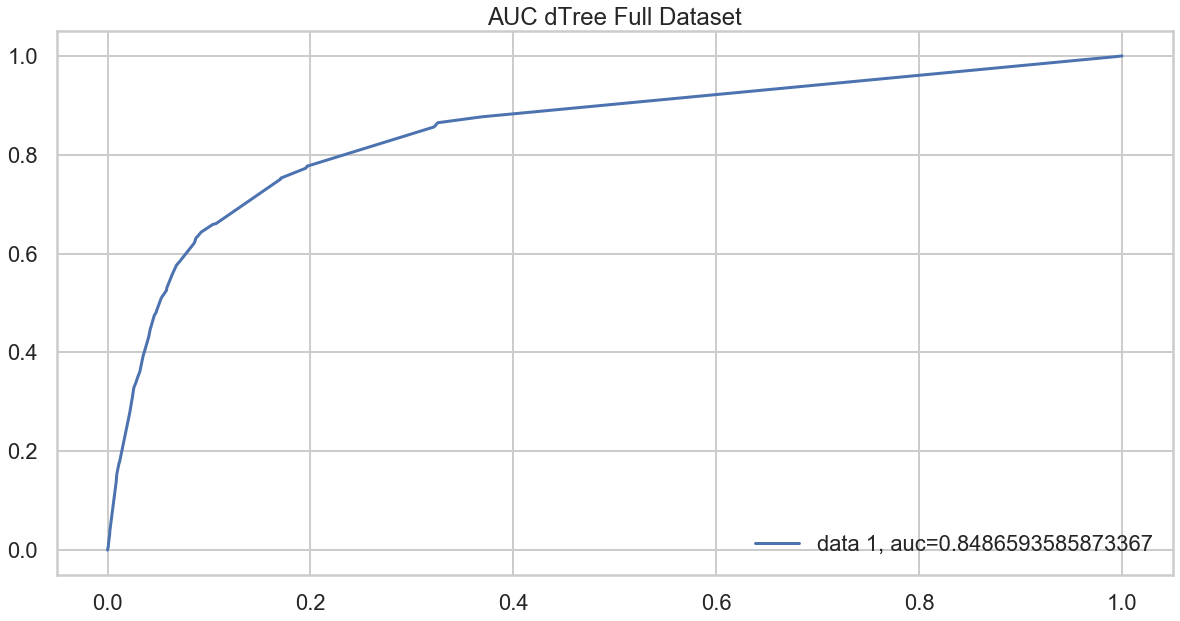

In [66]:
#Plotting the ROC curve
plt.figure( figsize = (20,10))
y_pred_proba = dTree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.title('AUC dTree Full Dataset')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

0.5724712474196402


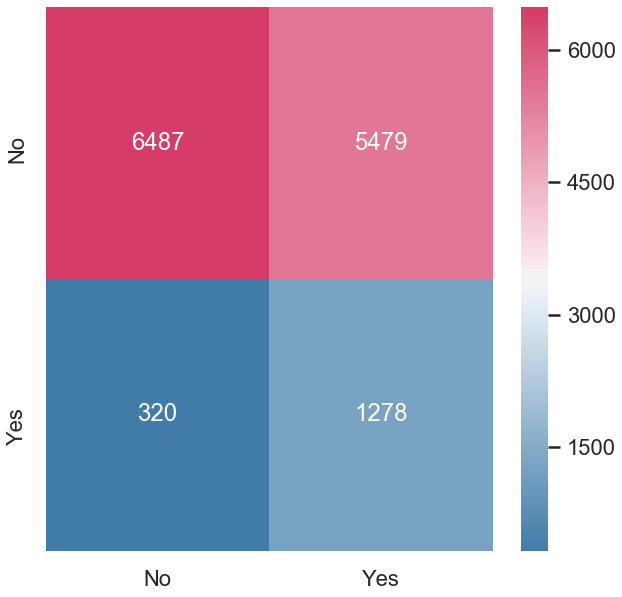

In [61]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (10,10))
sns.heatmap(df_cm,cmap = cmap, annot=True ,fmt='g')

In [62]:
#Using Bagging
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

0.6520200530816869


In [63]:
# Using AdaBoost
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))


0.5051607195517547


In [64]:
#Using Gradient Boost
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

0.6813624299616632


In [65]:
#Using Random Forest
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

0.6142730757888528


# Conclusion


While verifying the data, the main hypothesis to it is based on the effect of conversion: is there valid conversion when the outcome of the campaign is unknown? Is there any value predicting this outcome?

However, for the sake of curiosity, I have created both studies, creating a comparison between how would the model behave with and without this noise, and how it would fare with the ensemble techniques.

#### With this in mind, the highest score was granted to the treated Dataset, using Decision Trees with Gradient Boosting, winning Adaptative Boosting just by a hair.

Also, working with the unclean Dataset, there were some OK results while not using the Ensemble techniques, far inferior to the ones verified for the clean Dataset.

Therefore and to conclude, this model seems to have some room for improvement with feature engineering, better (more focused) 